# Herunterskalierte bioklimatische Indikatoren

Dieses Datensatz bietet 76 bioklimatische Indikatoren mit einer Auflösung von 1 × 1 km für Europa, Nordbrasilien und Zentralafrika. Die Indikatoren wurden mithilfe von ERA5 (ERA5-Land)-Reanalysedaten und statistischer Herunterskalierung rekonstruiert. Sie konzentrieren sich auf Biodiversität und Ökosystemdienstleistungen und umfassen Variablen wie Oberflächenenergie, Dürre, Bodenfeuchte, Wind und essenzielle Klimavariablen. Der Datensatz wurde für die Biodiversitätsforschung entwickelt und unterstützt vielfältige Anwendungen durch zeitliche Auflösungen von monatlich bis hin zu mehrjährigen Mittelwerten.

**Informationen zum Datensatz:**
* Quelle: [Downscaled Bioclimatic Indicators](https://cds.climate.copernicus.eu/datasets/sis-biodiversity-era5-regional?tab=overview)
* Author: str.ucture GmbH
* Notebook-Version: 1.1 (Aktualisiert: 21. Januar 2025)

## 1. Festlegen der Pfade und Arbeitsverzeichnisse

In [1]:
import os

''' ---- Verzeichnisse hier angeben ---- '''
download_folder = r".\data\sis-biodiversity-era5-regional\download"
working_folder = r".\data\sis-biodiversity-era5-regional\working"
geotiff_folder = r".\data\sis-biodiversity-era5-regional\geotiff"
csv_folder = r".\data\sis-biodiversity-era5-regional\csv"
output_folder = r".\data\sis-biodiversity-era5-regional\output"
''' ----- Ende der Angaben ---- '''

os.makedirs(download_folder, exist_ok=True)
os.makedirs(working_folder, exist_ok=True)
os.makedirs(geotiff_folder, exist_ok=True)
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

## 2. Herunterladen und Entpacken des Datensatzes

### 2.1 Authentifizierung

In [2]:
import cdsapi

def main():
    # API-Key für die Authentifizierung
    api_key = "fdae60fd-35d4-436f-825c-c63fedab94a4"
    api_url = "https://cds.climate.copernicus.eu/api"

    # Erstellung des CDS-API-Clients
    client = cdsapi.Client(url=api_url, key=api_key)
    return client

### 2.2 Definieren die „request“ und laden Sie den Datensatz herunter

In [3]:
# Definieren der Begrenzungsrahmen-Koordinaten (WGS84-Format)
# Das Koordinatenformat lautet: [Norden, Westen, Süden, Osten]
bbox_wgs84_deutschland = [56.0, 5.8, 47.2, 15.0]
bbox_wgs84_de_standard = [5.7, 47.1, 15.2, 55.2]
bbox_wgs84_konstanz = [47.9, 8.9, 47.6, 9.3]
bbox_wgs84_konstanz_standard = [9.0, 47.6, 9.3, 47.8]  # [West, South, East, North]

# Alternativ können Sie ein Shapefile für eine präzise geografische Filterung verwenden
import geopandas as gpd
import math

# Beispiel: Shapefile von Konstanz laden (WGS84-Projektion)
de_shapefile = r"./shapefiles/de_boundary.shp"
de_gdf = gpd.read_file(de_shapefile)

# Extrahieren Sie den Begrenzungsrahmen des Shapefiles
de_bounds = de_gdf.total_bounds

# Passen Sie den Begrenzungsrahmen an und puffern Sie ihn, um einen etwas größeren
de_bounds_adjusted = [(math.floor(de_bounds[0]* 10)/10)-0.1,
                      (math.floor(de_bounds[1]* 10)/10)-0.1,
                      (math.ceil(de_bounds[2]* 10)/10)+0.1,
                      (math.ceil(de_bounds[3]* 10)/10)+0.1]

# Ordnen Sie die Koordinaten in das Format: [Nord, West, Süd, Ost] um.
bbox_de_bounds_adjusted = [de_bounds_adjusted[3], de_bounds_adjusted[0],
                           de_bounds_adjusted[1], de_bounds_adjusted[2]]

In [4]:
## Derzeit ist für Region == Europa nur ERA5 verfügbar
# Für Region == Zentralafrika ist ERA5 verfügbar
# Für Region == Nördliches Brasilien ist ERA5-Land verfügbar

## Variablengruppe: Bioklimatische Indikatoren wie in WORLDCLIM
# cds.climate.copernicus.eu/datasets/sis-biodiversity-era5-regional?tab=download
variable_group = "bioclimatic_indicators_as_in_worldclim"

In [5]:
# Definition des Datensatzes und der Request-Parameter
dataset = "sis-biodiversity-era5-regional"
request = {
    "region": ["europe"],
    "origin": "era5",
    "variable": [
        "annual_mean_temperature",
        "mean_diurnal_range",
        "isothermality",
        "temperature_seasonality",
        "maximum_temperature_of_warmest_month",
        "minimum_temperature_of_coldest_month",
        "temperature_annual_range",
        "mean_temperature_of_wettest_quarter",
        "mean_temperature_of_driest_quarter",
        "mean_temperature_of_warmest_quarter",
        "mean_temperature_of_coldest_quarter",
        "annual_precipitation",
        "precipitation_of_wettest_month",
        "precipitation_of_driest_month",
        "precipitation_seasonality",
        "precipitation_of_wettest_quarter",
        "precipitation_of_driest_quarter",
        "precipitation_of_warmest_quarter",
        "precipitation_of_coldest_quarter"
    ],
    "statistic": [
        "mean",
        "median",
        "25th_quartile",
        "75th_quartile"
    ],
    "version": ["1_0"],
    # "area": bbox_de_bounds_adjusted,  # Die Definition des Bereichs mit einem Begrenzungsrahmen verursacht Probleme beim Herunterladen
    # Fehler: "Ihre Anfrage ist zu groß, bitte reduzieren Sie Ihre Auswahl"
}

In [6]:
# Führen Sie es aus, um den Datensatz herunterzuladen:
def main_retrieve():
    dataset_filename = f"{dataset}_{variable_group}.zip"
    dataset_filepath = os.path.join(download_folder, dataset_filename)

    # Den Datensatz nur herunterladen, wenn er noch nicht heruntergeladen wurde
    if not os.path.isfile(dataset_filepath):
        # Rufen Sie den CDS-Client nur auf, wenn der Datensatz noch nicht heruntergeladen wurde.
        client = main()
        # Den Datensatz mit den definierten Anforderungsparametern herunterladen
        client.retrieve(dataset, request, dataset_filepath)
    else:
        print("Datensatz bereits heruntergeladen.")

if __name__ == "__main__":
    main_retrieve()

Datensatz bereits heruntergeladen.


### 2.3 Extrahieren die ZIP-Datei in Ordner

In [7]:
import zipfile

# Erstelle den Ordnerpfad zum Extrahieren der Zip-Datei(en) basierend auf der Variablengruppe
extract_folder = os.path.join(working_folder, variable_group)
os.makedirs(extract_folder, exist_ok=True)

# Entpacken der ZIP-Datei
try:
    if not os.listdir(extract_folder):
        dataset_filename = f"{dataset}_{variable_group}.zip"
        dataset_filepath = os.path.join(download_folder, dataset_filename)
        
        with zipfile.ZipFile(dataset_filepath, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
            print(f"Dateien erfolgreich extrahiert nach: {extract_folder}")
    else:
        print("Ordner ist nicht leer. Entpacken überspringen.")
except FileNotFoundError:
    print(f"Fehler: Die Datei {dataset_filepath} wurde nicht gefunden.")
except zipfile.BadZipFile:
    print(f"Fehler: Die Datei {dataset_filepath} ist keine gültige ZIP-Datei.")
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")

Ordner ist nicht leer. Entpacken überspringen.


## 3. Untersuchen der Metadaten der NetCDF4-Datei

### 3.1 Erstellen eines DataFrame mit verfügbaren NetCDF-Dateien

In [8]:
import re
import pandas as pd
import netCDF4 as nc
import numpy as np

def meta(filename):
    # Überprüfen, ob der Dateiname dem erwarteten Muster entspricht
    match = re.search(
        r"(?P<ds_variable>BIO\d{2})_(?P<ds_origin>[\w-]+)-(?P<statistic>mean|median|q25|q75)_v(?P<version>\d+\.\d+)",
        filename
        )

    # Fehler ausgeben, wenn der Dateiname nicht dem erwarteten Schema entspricht
    if not match:
        match = re.search("Der angegebene Dateiname entspricht nicht dem erwarteten Benennungsschema.")
        
    # Funktion zum Extrahieren des Variablennamens aus der NetCDF-Datei
    def get_nc_variable():
        with nc.Dataset(os.path.join(extract_folder, filename), 'r') as nc_dataset:
            variable_names = list(nc_dataset.variables.keys())

            primary_variable_index = 3  # Adjust this index as needed
            if primary_variable_index >= len(variable_names):
                raise IndexError("Der Index der primären Variablen liegt außerhalb des Bereichs für die NetCDF-Variablen.")
            
            primary_variable = variable_names[primary_variable_index]
            primary_variable_shape = np.shape(nc_dataset[primary_variable])

            return primary_variable, primary_variable_shape
    
    # Metadaten als Dictionary zurückgeben
    return dict(
        filename=filename,
        path=os.path.join(extract_folder, filename),
        ds_variable=match.group('ds_variable'),
        ds_origin=match.group('ds_origin'),
        variable_name=get_nc_variable()[0],
        variable_shape=get_nc_variable()[1],
        statistic=match.group('statistic')
    )

# Metadaten für alle NetCDF-Dateien im Ordner extrahieren
# Das Dictionary 'nc_files' enthält alle relevanten Metadaten der verfügbaren NetCDF4-Dateien
# Dieses Dictionary wird später verwendet, um die Dateien in GeoTiff zu konvertieren
nc_files = [meta(f) for f in os.listdir(extract_folder) if f.endswith('.nc')]
df_nc_files = pd.DataFrame.from_dict(nc_files)

# Pandas-Anzeigeoptionen anpassen
pd.options.display.max_colwidth = 30

# DataFrame anzeigen, ohne die Spalte 'path' darzustellen
df_nc_files.head(10).loc[:, df_nc_files.columns != 'path']

,filename,ds_variable,ds_origin,variable_name,variable_shape,statistic
0,BIO01_era5-to-1km_1979-201...,BIO01,era5-to-1km_1979-2018,BIO01,"(1, 4800, 9600)",mean
1,BIO01_era5-to-1km_1979-201...,BIO01,era5-to-1km_1979-2018,BIO01,"(1, 4800, 9600)",median
2,BIO01_era5-to-1km_1979-201...,BIO01,era5-to-1km_1979-2018,BIO01,"(1, 4800, 9600)",q25
3,BIO01_era5-to-1km_1979-201...,BIO01,era5-to-1km_1979-2018,BIO01,"(1, 4800, 9600)",q75
4,BIO02_era5-to-1km_1979-201...,BIO02,era5-to-1km_1979-2018,BIO02,"(1, 4800, 9600)",mean
5,BIO02_era5-to-1km_1979-201...,BIO02,era5-to-1km_1979-2018,BIO02,"(1, 4800, 9600)",median
6,BIO02_era5-to-1km_1979-201...,BIO02,era5-to-1km_1979-2018,BIO02,"(1, 4800, 9600)",q25
7,BIO02_era5-to-1km_1979-201...,BIO02,era5-to-1km_1979-2018,BIO02,"(1, 4800, 9600)",q75
8,BIO03_era5-to-1km_1979-201...,BIO03,era5-to-1km_1979-2018,BIO03,"(1, 4800, 9600)",mean
9,BIO03_era5-to-1km_1979-201...,BIO03,era5-to-1km_1979-2018,BIO03,"(1, 4800, 9600)",median


### 3.2 Einzigartige Variablennamen und verfügbare Variablen ausgeben

In [9]:
# Variable definieren, um bereits verarbeitete Variablennamen zu speichern und Duplikate zu vermeiden  
seen_variables = set()

# Alle Variablen in jeder NetCDF-Datei auflisten  
for i, nc_file in enumerate(nc_files):
    variable_name = nc_file['variable_name']
    
    # Überspringen, wenn die Variable bereits verarbeitet wurde  
    if variable_name in seen_variables:
        continue

    # NetCDF-Datei im Lesemodus öffnen  
    with nc.Dataset(nc_file['path'], mode='r') as nc_dataset:  
        # Alle Variablen im aktuellen Datensatz auflisten  
        variables_list = list(nc_dataset.variables.keys())  
        
        # Details der Datei und ihrer Variablen ausgeben  
        print(f"{i + 1:<2} {variable_name:<18}: Verfügbare Variablen: {variables_list}") 
    
    # Diese Variable als verarbeitet markieren  
    seen_variables.add(variable_name)

1  BIO01             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO01']
5  BIO02             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO02']
9  BIO03             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO03']
13 BIO04             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO04']
17 BIO05             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO05']
21 BIO06             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO06']
25 BIO07             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO07']
29 BIO08             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO08']
33 BIO09             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO09']
37 BIO10             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO10']
41 BIO11             : Verfügbare Variablen: ['latitude', 'longitude', 'time', 'BIO11']
45 BIO12             : Verfügbar

In [10]:
# Alle Variableninformationen in jeder NetCDF-Datei auflisten  
seen_variables = set()

# Alle variablen Informationen in jeder NetCDF-Datei auflisten
for i, nc_file in enumerate(nc_files):
    variable_name = nc_file['variable_name']
    
    # Überspringen, wenn die Variable bereits verarbeitet wurde
    if variable_name in seen_variables:
        continue
    
    # NetCDF-Datei im Lesemodus öffnen
    with nc.Dataset(nc_file['path'], mode='r') as nc_dataset:  
        # Primärvariable-Daten abrufen  
        variable_data = nc_dataset[variable_name]  

        # Zusammenfassung der Primärvariable erstellen  
        summary = {  
            "Variablenname": variable_name,  
            "Datentyp": variable_data.dtype,  
            "Form": variable_data.shape,  
            "Variableninfo": f"{variable_data.dimensions}",  
            "Einheiten": getattr(variable_data, "units", "N/A"),  
            "Langer Name": getattr(variable_data, "long_name", "N/A"),  
        }  

        # Datensatz-Zusammenfassung als DataFrame zur besseren Visualisierung anzeigen  
        nc_summary = pd.DataFrame(list(summary.items()), columns=['Beschreibung', 'Bemerkungen'])  
        print(f"{i + 1}. Zusammenfassung der Variable '{variable_name}':")  
        display(nc_summary)  

    # Variablenname zur Liste der bereits verarbeiteten Variablen hinzufügen  
    seen_variables.add(variable_name)  

    # Ausgabe begrenzen  
    output_limit = 2  
    if len(seen_variables) >= output_limit:  
        print(f".... (Ausgabe auf die ersten {output_limit} Variablen gekürzt)")  
        break  

1. Zusammenfassung der Variable 'BIO01':


,Beschreibung,Bemerkungen
0,Variablenname,BIO01
1,Datentyp,float32
2,Form,"(1, 4800, 9600)"
3,Variableninfo,"('time', 'latitude', 'long..."
4,Einheiten,K
5,Langer Name,Temperature annual mean


5. Zusammenfassung der Variable 'BIO02':


,Beschreibung,Bemerkungen
0,Variablenname,BIO02
1,Datentyp,float32
2,Form,"(1, 4800, 9600)"
3,Variableninfo,"('time', 'latitude', 'long..."
4,Einheiten,K
5,Langer Name,Mean diurnal range (mean o...


.... (Ausgabe auf die ersten 2 Variablen gekürzt)


## 4. Exportieren der NetCDF4-Dateien im CSV-Format

⚠️ <span style="background-color: red; color: white; padding: 2px 4px;">Wichtig</span>: Nach dem Herunterladen der Datensätze definiere die interessierende Variable im folgenden Code. Wenn du beispielsweise an der jährlichen Durchschnittstemperatur interessiert bist, wähle die Variable **BIO01**, die der **Jährlichen Durchschnittstemperatur (BIO01)** entspricht.

In [11]:
# Ändere hier die ausgewählte Variable
selected_variable = "BIO01"

# Filtere die NetCDF-Dateien basierend auf der ausgewählten Variable
nc_files_subset = [nc_file for nc_file in nc_files if nc_file['ds_variable'] == selected_variable]

### 4.1 Define a function to convert NetCDF data to a pandas DataFrame

In [12]:
import xarray as xr

# Funktion zur Konvertierung von NetCDF-Daten in ein Pandas DataFrame
def netcdf_to_dataframe(
    nc_file,
    bounding_box=None
    ):

    # Öffne das NetCDF-Dataset im Lesemodus
    with xr.open_dataset(nc_file['path']) as nc_dataset:
        # Zugriff auf die Variablendaten aus dem Datensatz
        variable_data = nc_dataset[nc_file['variable_name']]
        
        # Sicherstellen, dass die Namen für Breiten- und Längengrad korrekt sind
        latitude_name = 'latitude' if 'latitude' in nc_dataset.coords else 'lat'
        longitude_name = 'longitude' if 'longitude' in nc_dataset.coords else 'lon'
        
        # Falls eine Begrenzungsbox angegeben ist, die Daten filtern
        if bounding_box:
            filtered_data = variable_data.where(
                (nc_dataset[latitude_name] >= bounding_box[1]) & (nc_dataset[latitude_name] <= bounding_box[3]) &
                (nc_dataset[longitude_name] >= bounding_box[0]) & (nc_dataset[longitude_name] <= bounding_box[2]),
                drop=True
            )
        else:
            filtered_data = variable_data

        # Umwandlung des xarray-Datensatzes in ein Pandas DataFrame
        df = filtered_data.to_dataframe().reset_index().set_index(['time', latitude_name, longitude_name])
        
        # Benenne die Wertspalte um, sodass der Dateiname als Spaltenname verwendet wird (optional)
        df.rename(columns={nc_file['variable_name']: nc_file['filename']}, inplace=True)
        
        return df

### 4.2 Filtern nach Boundary Box, DataFrame erstellen und als CSV-Datei exportieren

> Hinweis: **bbox_wgs84_de_standard** wird verwendet, um Daten für Deutschland zu filtern.

In [13]:
from tqdm.notebook import tqdm
import textwrap

# Erstelle einen Ordner für die Teilmengen-CSV-Dateien basierend auf der Variablengruppe
subset_csv_folder = os.path.join(csv_folder, variable_group)
os.makedirs(subset_csv_folder, exist_ok=True)

# Definiere den CSV-Dateinamen und Pfad für die Ausgabe
subset_csv_filename = f"{selected_variable}.csv.zip"
subset_csv_filepath = os.path.join(subset_csv_folder, subset_csv_filename)

# Erstelle ein DataFrame und eine CSV-Datei, falls sie noch nicht existiert
if not os.path.isfile(subset_csv_filepath):
    # Verarbeite NetCDF-Dateien in DataFrames und füge sie zusammen
    dataframes = [netcdf_to_dataframe(nc_file=nc_file, bounding_box=bbox_wgs84_de_standard) for nc_file in tqdm(selected_nc_files)]
    df_merged = pd.concat(dataframes, axis=1)

    # Exportiere das zusammengefügte DataFrame als komprimierte CSV-Datei
    df_merged.to_csv(subset_csv_filepath, sep=',', encoding='utf8', compression='zip')
else:
    print(f"Datei existiert bereits unter {subset_csv_filepath}. Überspringen den Export.")
    print("Lesen bestehende CSV-Datei ein...")
    df_merged = pd.read_csv(subset_csv_filepath).set_index(['time', 'latitude', 'longitude'])

# Funktion zum Umbruch der Spaltennamen für bessere Lesbarkeit
def wrap_column_names(df, width):
    wrapped_columns = {col: " ".join(textwrap.wrap(col, width)) for col in df.columns}
    return df.rename(columns=wrapped_columns)
    
# Ändere die Pandas-Anzeigeoptionen
pd.options.display.float_format = '{:,.2f}'.format
    
# Zeige das DataFrame an
df_wrapped = wrap_column_names(df_merged, width=12)
df_wrapped

Datei existiert bereits unter .\data\sis-biodiversity-era5-regional\csv\bioclimatic_indicators_as_in_worldclim\BIO01.csv.zip. Überspringen den Export.


Lesen bestehende CSV-Datei ein...


BIO01_era5- to-1km_1979- 2018- mean_v1.0.nc  \
time       latitude longitude                                                
1999-01-01 47.10    5.70                              284.57                 
                    5.71                              284.57                 
                    5.72                              284.55                 
                    5.73                              284.54                 
                    5.74                              284.51                 
...                                                      ...                 
           55.20    15.16                             281.95                 
                    15.17                             281.94                 
                    15.18                             281.93                 
                    15.19                             281.93                 
                    15.20                             281.92                 

                               BIO01_era5- to-1km_1979- 2018- median_v1.0. nc  \
time       latitude longitude                                                   
1999-01-01 47.10    5.70                              284.59                    
                    5.71                              284.59                    
                    5.72                              284.57                    
                    5.73                              284.57                    
                    5.74                              284.54                    
...                                                      ...                    
           55.20    15.16                             282.07                    
                    15.17                             282.07                    
                    15.18                             282.06                    
                    15.19                             282.05                    
                    15.20                             282.05                    

                               BIO01_era5- to-1km_1979- 2018- q25_v1.0.nc  \
time       latitude longitude                                               
1999-01-01 47.10    5.70                              284.02                
                    5.71                              284.02                
                    5.72                              284.00                
                    5.73                              283.99                
                    5.74                              283.97                
...                                                      ...                
           55.20    15.16                             281.51                
                    15.17                             281.51                
                    15.18                             281.50                
                    15.19                             281.49                
                    15.20                             281.49                

                               BIO01_era5- to-1km_1979- 2018- q75_v1.0.nc  
time       latitude longitude                                              
1999-01-01 47.10    5.70                              285.10               
                    5.71                              285.10               
                    5.72                              285.08               
                    5.73                              285.07               
                    5.74                              285.05               
...                                                      ...               
           55.20    15.16                             282.72               
                    15.17                             282.71               
                    15.18                             282.70               
                    15.19                             282.70               
                    15.20                       

## 5. Exportieren der NetCDF4-Datei nach GeoTIFF

### 5.1 Definieren eine Funktion zum Exportieren der NetCDF4-Datei als GeoTIFF-Datei(en)

In [14]:
import numpy as np
from rasterio.transform import from_origin
import rasterio

from tqdm.notebook import tqdm

def main_export_geotiff(
    nc_file,
    bounding_box=None,
    output_directory=None):
    
    """
    Parameters:
        nc_file (dict): Ein Wörterbuch mit den Schlüsseln 'path' (Dateipfad), 'variable', 'rcp' und 'statistic'.
        bounding_box (list): [lon_min, lat_min, lon_max, lat_max] (optional).
        output_directory (str): Verzeichnis zum Speichern der Ausgabe-GeoTIFF-Dateien (optional).
    """
    
    # Öffnet die NetCDF-Datei
    with nc.Dataset(nc_file['path'], 'r') as nc_dataset:
        nc_dataset = nc.Dataset(nc_file['path'], 'r')
        
        lon = nc_dataset['longitude'][:]
        lat = nc_dataset['latitude'][:]
        
        # Falls eine Begrenzungsbox angegeben wurde, filtere die Daten entsprechend
        if bounding_box:
            lon_min, lat_min, lon_max, lat_max = bounding_box
            
            indices_lat = np.where((lat >= lat_min) & (lat <= lat_max))[0]
            indices_lon = np.where((lon >= lon_min) & (lon <= lon_max))[0]
            start_lat, end_lat = indices_lat[0], indices_lat[-1] + 1
            start_lon, end_lon = indices_lon[0], indices_lon[-1] + 1
        else:
            start_lat, end_lat = 0, len(lat)
            start_lon, end_lon = 0, len(lon)
        
        lat = lat[start_lat:end_lat]
        lon = lon[start_lon:end_lon]

        # Berechnet die räumliche Auflösung und die Rastertransformation
        dx = abs(lon[1] - lon[0])
        dy = abs(lat[1] - lat[0])
        transform = from_origin(lon.min() - dx / 2, lat.min() - dy / 2, dx, -dy)
            
        # Extrahiere Variablen-Daten
        variable_data = nc_dataset.variables[nc_file['variable_name']]
        variable_data_subset = variable_data[:]

        output_filename = f"{nc_file['variable_name']}-{nc_file['statistic']}.tif"
        
        # Export als GeoTIFF-Dateien
        if output_directory:
            subset_directory_path = output_directory
        else:
            subset_directory_path = os.path.join(geotiff_folder, f"{selected_variable}")
            os.makedirs(subset_directory_path, exist_ok=True)
        
        for year_index in tqdm(range(variable_data_subset.shape[0]),
                            desc="Exportieren GeoTIFF-Dateien"):
            
            # Definiere den Ausgabe-Dateipfad
            output_filepath = os.path.join(subset_directory_path, output_filename)

            # Exportiere den aktuellen Zeitschritt als GeoTIFF
            with rasterio.open(
                output_filepath,
                "w",
                driver="GTiff",
                dtype=str(variable_data_subset.dtype),
                width=variable_data_subset.shape[2],
                height=variable_data_subset.shape[1],
                count=1,
                crs="EPSG:4326",
                nodata=-9999,
                transform=transform,
            ) as dst:
                time_slice_data = variable_data_subset[year_index, :, :]
                dst.write(time_slice_data , 1)

### 5.2 Ausgewählte NetCDF4-Datei(en) in GeoTIFF-Datei(en) exportieren

In [15]:
if __name__ == "__main__":
    # Exportieren Sie alle NetCDF-Dateien als GeoTIFF-Dateien.
    for nc_file in nc_files_subset:
        main_export_geotiff(
            nc_file=nc_file,
            bounding_box=None,
        )

Exportieren GeoTIFF-Dateien:   0%|          | 0/1 [00:00<?, ?it/s]

Exportieren GeoTIFF-Dateien:   0%|          | 0/1 [00:00<?, ?it/s]

Exportieren GeoTIFF-Dateien:   0%|          | 0/1 [00:00<?, ?it/s]

Exportieren GeoTIFF-Dateien:   0%|          | 0/1 [00:00<?, ?it/s]

## 6. Analyse und Visualisierung Optionen

### 6.1 Definieren eine Funktion zur Erstellung einer Heatmap

In [16]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np

def main_plt_plot(
        nc_file=nc_file,
        bounding_box=None):
    
    # Öffnet die NetCDF-Datei
    nc_dataset = nc.Dataset(nc_file['path'], mode='r')
    latitudes = nc_dataset.variables['latitude'][:]
    longitudes = nc_dataset.variables['longitude'][:]

    # Falls eine Begrenzungsbox angegeben wurde, filtere die Daten entsprechend
    if bounding_box:
        lat_indices = np.where((latitudes >= bounding_box[1]) & (latitudes <= bounding_box[3]))[0]
        lon_indices = np.where((longitudes >= bounding_box[0]) & (longitudes <= bounding_box[2]))[0]

        lat_subset = latitudes[lat_indices]
        lon_subset = longitudes[lon_indices]
    else:
        lat_indices = slice(None)
        lon_indices = slice(None)

        lat_subset = latitudes
        lon_subset = longitudes

    # Extrahiere Variablen-Daten
    variable_name = nc_file['variable_name']
    variable_data = nc_dataset.variables[variable_name][..., lat_indices, lon_indices]
    var_units = getattr(nc_dataset.variables[variable_name], "units", "N/A")
    var_longname = getattr(nc_dataset.variables[variable_name], "long_name", "N/A")

    # NaN-Werte für Perzentilberechnungen entfernen
    band_data_nonan = variable_data[~np.isnan(variable_data)]
    vmin = np.nanpercentile(band_data_nonan, 1)
    vmax = np.nanpercentile(band_data_nonan, 99)

    def dynamic_round(value):
        # Bestimmen Sie die Größe des Wertes.
        order_of_magnitude = np.floor(np.log10(abs(value)))
        
        # Verwenden Sie diese Größe, um die Genauigkeit dynamisch zu wählen.
        if order_of_magnitude < -2:  # Werte kleiner als 0,01
            return round(value, 3)
        elif order_of_magnitude < -1:  # Werte zwischen 0,01 und 1
            return round(value, 2)
        elif order_of_magnitude < 0:  # Werte zwischen 1 und 10
            return round(value, 1)
        else:  # Werte 10 oder größer
            return round(value)
    
    # Dynamische Rundung auf vmin und vmax anwenden
    vmin = dynamic_round(vmin)
    vmax = dynamic_round(vmax)

    bins = 10
    interval = (vmax - vmin) / bins

    # Erstellen Sie ein 2D-Netzgitter für die grafische Darstellung.
    lon_grid, lat_grid = np.meshgrid(lon_subset, lat_subset)

    # Create the plot
    fig, ax = plt.subplots(
        figsize=(12, 8),
        facecolor='#f1f1f1',
        edgecolor='k',
        subplot_kw={'projection': ccrs.PlateCarree()}
    )

    # Kartenmerkmale hinzufügen
    ax.coastlines(edgecolor='black', linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)

    # Erstellen Sie ein Farbnetzdiagramm mit der angegebenen Farbkarte und den Grenzen.
    cmap = plt.get_cmap("viridis", bins)
    pcm = ax.pcolormesh(
        lon_grid, lat_grid, variable_data[0, :, :],
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        shading='auto',
        vmin=vmin,
        vmax=vmax
    )

    # Passe die Kartenausdehnung an die Daten an
    ax.set_extent([lon_subset.min(), lon_subset.max(), lat_subset.min(), lat_subset.max()], crs=ccrs.PlateCarree())

    # Einen Farbbalken hinzufügen
    ticks = np.linspace(vmin, vmax, num=bins + 1)
    cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', pad=0.02, ticks=ticks)
    cbar.set_label(f"{var_longname}, ({variable_name}), {var_units}", fontsize=12)
    cbar.ax.tick_params(labelsize=12)
    
    # Gitterlinien hinzufügen
    gl = ax.gridlines(draw_labels=True,
                      crs=ccrs.PlateCarree(),
                      linewidth=0.8,
                      color='gray',
                      alpha=0.7,
                      linestyle='--')
    gl.top_labels = False 
    gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    
    # Add title and labels
    fig.text(0.5, 0.0, 'Longitude', ha='center', fontsize=14)
    fig.text(0.04, 0.5, 'Latitude', va='center', rotation='vertical', fontsize=14)
    ax.set_aspect("equal")

    # Titel und Beschriftungen hinzufügen
    ax.set_title(f"{var_longname} ({variable_name})", fontsize=14)

    # Layout anpassen und das Diagramm anzeigen
    plt.tight_layout()
    plt.show()

C:\Users\ShaileshShrestha\anaconda3\envs\cds_env\lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


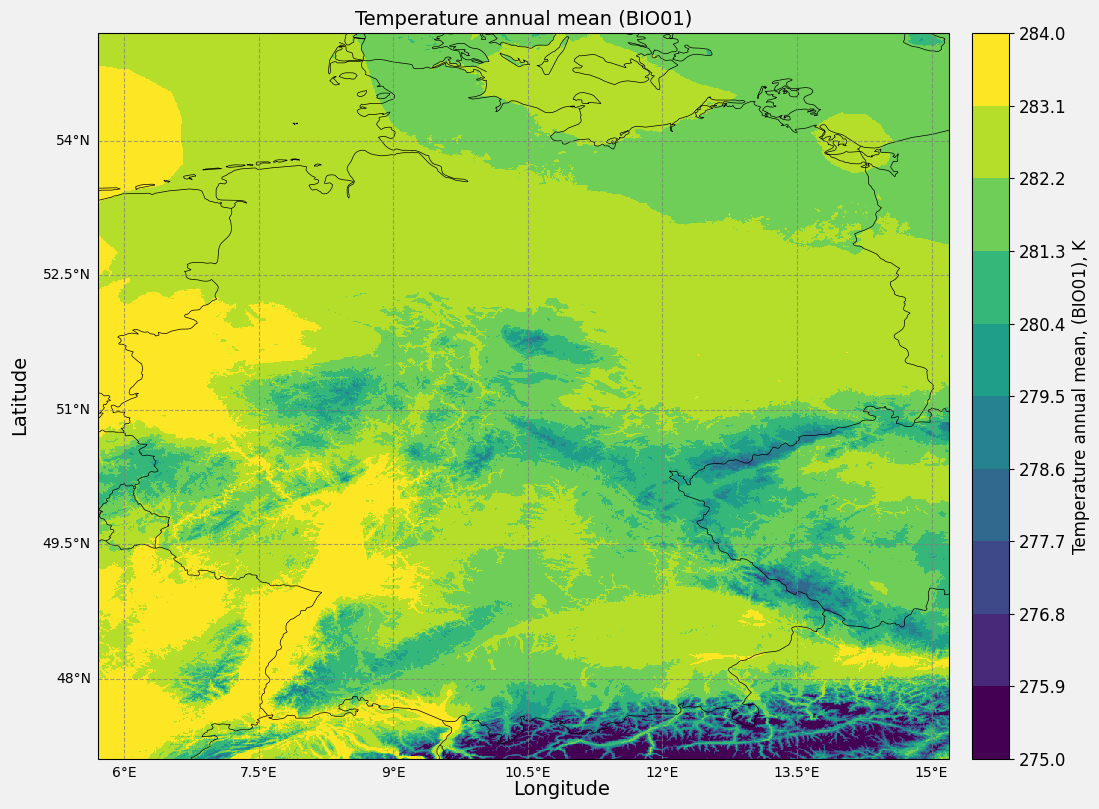

In [17]:
if __name__ == "__main__":
    # Beispiel für einen Anwendungsfall
    main_plt_plot(nc_file=nc_files_subset[0],
                  bounding_box=bbox_wgs84_de_standard
    )